In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# plotting libs
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

C:\Users\uger7\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
boston = pd.read_csv('Boston.csv')

Variables  

There are 14 attributes in each case of the dataset. They are:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 dollars
- PTRATIO - pupil/teacher ratio by town
- black - proportion of blacks by town
- LSTAT - perc lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [3]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [4]:
boston.shape

(506, 14)

In [5]:
boston.drop(columns=['chas','nox','dis','rad','lstat'],inplace=True)

In [6]:
pop = pd.read_csv('population.csv')
boston['population'] = np.array(pop['population'].sample(len(boston)))
boston['population_orig'] = boston['population']
while boston['population'].min() < 100:
    boston['population'].loc[boston['population'] < 100] = boston['population'].loc[boston['population'] < 100]*np.random.uniform(low=1.1,high=1.5,size=len(boston['population'].loc[boston['population'] < 100]))
    
boston['population'] = round(boston['population'],0)

C:\Users\uger7\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
boston.head()

,crim,zn,indus,rm,age,tax,ptratio,black,medv,population,population_orig
0,0.00632,18.0,2.31,6.575,65.2,296,15.3,396.90,24.0,122.0,122
1,0.02731,0.0,7.07,6.421,78.9,242,17.8,396.90,21.6,730.0,730
2,0.02729,0.0,7.07,7.185,61.1,242,17.8,392.83,34.7,1695.0,1695
3,0.03237,0.0,2.18,6.998,45.8,222,18.7,394.63,33.4,13713.0,13713
4,0.06905,0.0,2.18,7.147,54.2,222,18.7,396.90,36.2,957.0,957


In [8]:
boston['families'] = boston['population']/3.92
families_ran_fact = np.random.uniform(low=.92,high=1.08,size=len(boston))
boston['families'] = boston['families'] * families_ran_fact
boston['families'] = round(boston['families'],0)

In [9]:
boston['median_home_value'] = boston['medv']*10000
boston['median_income'] = boston['median_home_value']/4.2
boston['median_income'].loc[boston['median_income'] <= 20000] = 20000
inc_rand_fact = np.random.normal(loc=1.05,scale=.23,size=len(boston))
boston['median_income'] = boston['median_income'] * inc_rand_fact
boston['median_income'] = round(boston['median_income'],0)

C:\Users\uger7\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


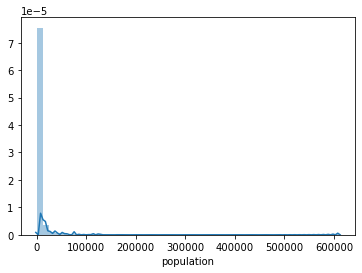

In [10]:
sns.distplot(boston['population'])

In [11]:
boston.head()

,crim,zn,indus,rm,age,tax,ptratio,black,medv,population,population_orig,families,median_home_value,median_income
0,0.00632,18.0,2.31,6.575,65.2,296,15.3,396.90,24.0,122.0,122,30.0,240000.0,48149.0
1,0.02731,0.0,7.07,6.421,78.9,242,17.8,396.90,21.6,730.0,730,184.0,216000.0,41248.0
2,0.02729,0.0,7.07,7.185,61.1,242,17.8,392.83,34.7,1695.0,1695,448.0,347000.0,102464.0
3,0.03237,0.0,2.18,6.998,45.8,222,18.7,394.63,33.4,13713.0,13713,3248.0,334000.0,83431.0
4,0.06905,0.0,2.18,7.147,54.2,222,18.7,396.90,36.2,957.0,957,239.0,362000.0,131602.0


In [12]:
boston.corr()

,crim,zn,indus,rm,age,tax,ptratio,black,medv,population,population_orig,families,median_home_value,median_income
crim,1.000000,-0.200469,0.406583,-0.219247,0.352734,0.582764,0.289946,-0.385064,-0.388305,-0.021542,-0.021562,-0.021940,-0.388305,-0.337245
zn,-0.200469,1.000000,-0.533828,0.311991,-0.569537,-0.314563,-0.391679,0.175520,0.360445,-0.031879,-0.031842,-0.032483,0.360445,0.268148
indus,0.406583,-0.533828,1.000000,-0.391676,0.644779,0.720760,0.383248,-0.356977,-0.483725,-0.023365,-0.023399,-0.024112,-0.483725,-0.413003
rm,-0.219247,0.311991,-0.391676,1.000000,-0.240265,-0.292048,-0.355501,0.128069,0.695360,-0.058489,-0.058467,-0.058985,0.695360,0.597420
age,0.352734,-0.569537,0.644779,-0.240265,1.000000,0.506456,0.261515,-0.273534,-0.376955,0.031445,0.031403,0.032339,-0.376955,-0.301454
tax,0.582764,-0.314563,0.720760,-0.292048,0.506456,1.000000,0.460853,-0.441808,-0.468536,-0.013960,-0.013983,-0.013793,-0.468536,-0.415666
ptratio,0.289946,-0.391679,0.383248,-0.355501,0.261515,0.460853,1.000000,-0.177383,-0.507787,0.055103,0.055043,0.053992,-0.507787,-0.410236
black,-0.385064,0.175520,-0.356977,0.128069,-0.273534,-0.441808,-0.177383,1.000000,0.333461,-0.006284,-0.006255,-0.004760,0.333461,0.297676
medv,-0.388305,0.360445,-0.483725,0.695360,-0.376955,-0.468536,-0.507787,0.333461,1.000000,-0.049985,-0.049940,-0.050261,1.000000,0.870803
population,-0.021542,-0.031879,-0.023365,-0.058489,0.031445,-0.013960,0.055103,-0.006284,-0.049985,1.000000,1.000000,0.999568,-0.049985,-0.037611


In [13]:
os = SMOTE()

boston_2 = boston.copy()
cols = boston_2.columns.to_list()
boston_2.drop(columns=['medv','population_orig'],inplace=True)

while len(boston_2) < 25000:
    z = [0] * int(round(len(boston_2)*.75,0))
    o = [1] * (len(boston_2) - len(z))
    array = np.array(z+o)
    np.random.shuffle(array)
    boston_2, array = os.fit_sample(boston_2,array)
    
for col in boston_2.columns:
    boston_2[col] = boston_2[col] * np.random.normal(loc=1,scale=np.random.uniform(low=.01,high=.1,size=len(boston_2)))

for col in ['population','families','median_home_value','median_income']:
    boston_2[col] = round(boston_2[col].astype(np.int64),0)
    
boston_2.shape

(29202, 12)

In [14]:
boston_2.head()

,crim,zn,indus,rm,age,tax,ptratio,black,population,families,median_home_value,median_income
0,0.006327,17.556007,2.359149,6.504921,62.862473,334.949373,15.943097,396.364778,104,30,239287,50063
1,0.028179,0.000000,6.441148,6.215812,71.838785,243.942801,17.718216,357.309554,713,182,216478,41114
2,0.027426,0.000000,7.017856,7.205406,60.689597,242.365811,19.312809,373.200261,1715,430,351418,99115
3,0.030093,0.000000,2.146911,7.919227,46.238514,201.591460,17.239374,392.251995,13871,3355,344907,80509
4,0.067234,0.000000,2.036660,6.714654,53.445008,222.726550,19.970967,396.001566,1075,245,356289,133730


In [15]:
boston_3 = boston_2.copy()

#pca = PCA(n_components=len(boston_3.columns))
#pca.fit(boston_3)
#boston_4 = pca.transform(boston_3)

random_factor = np.random.normal(loc=1,scale=0.05,size=len(boston_3))

from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import normalize

boston_3['crim'] = np.log(boston_3['crim'])
boston_3['population'] = np.log(boston_3['population'])
boston_3['median_home_value_sq'] = boston_3['median_home_value']**2
boston_3['median_income'] = np.sqrt(boston_3['median_income'])

cols = boston_3.columns

scaler = StandardScaler()
scaler.fit(boston_3)
boston_3 = pd.DataFrame(scaler.transform(boston_3), columns = cols)
boston_3['random'] = random_factor

boston_3.head()

,crim,zn,indus,rm,age,tax,ptratio,black,population,families,median_home_value,median_income,median_home_value_sq,random
0,-2.764711,0.502581,-1.484127,0.211133,-0.400634,-0.478402,-1.249329,0.526708,-2.270468,-0.269162,0.147681,-0.251567,-0.038950,0.978623
1,-1.905147,-0.576345,-0.839107,-0.176773,0.023075,-1.076582,-0.408271,0.039844,-0.724934,-0.237708,-0.103283,-0.657386,-0.239712,0.986868
2,-1.920718,-0.576345,-0.747978,1.150995,-0.503200,-1.086947,0.347254,0.237938,-0.020294,-0.186387,1.381442,1.510015,1.240225,1.032297
3,-1.867317,-0.576345,-1.517664,2.108750,-1.185335,-1.354954,-0.635148,0.475438,1.657947,0.418902,1.309803,0.908798,1.152668,1.048024
4,-1.404744,-0.576345,-1.535085,0.492539,-0.845167,-1.216035,0.659092,0.522180,-0.395293,-0.224671,1.435037,2.493837,1.306799,1.043341


In [16]:
sample = boston_3.sample(1)

In [17]:
sample

,crim,zn,indus,rm,age,tax,ptratio,black,population,families,median_home_value,median_income,median_home_value_sq,random
3277,-0.749785,2.977064,-1.302646,2.498959,-1.868008,-0.479345,-1.410121,0.299079,-0.448552,-0.220118,1.833396,2.083652,1.83035,1.062994


In [18]:
boston_3['sales'] = round(boston_3.apply(lambda x: 
             x[0] * - 50 +                 # crim
             x[1] * 10 +                   # zn
             x[2] * -20 +                  # indus
             x[3] * 0 +                   # rm
             x[4] * 80 +                   # age
             x[5] * -100  +                 # tax
             x[6] * 10 +                  # ptratio
             x[7] * 0 +                     # black
             x[8] * 1800 +                   # population
             x[9]*0 +                       # families
             x[10] * 100 +                 # median_home_value
             x[11] * -800 +                 # median_income
             x[12] * -3000 +                 # mhv^2
             42000,                   # intercept
            axis=1)*boston_3['random'],2)

In [19]:
boston_3['sales'].isnull().sum()

0

In [20]:
print('min',boston_3['sales'].min())
print('mean',boston_3['sales'].mean())
print('max',boston_3['sales'].max())
print('std',boston_3['sales'].std())

min 20187.79
mean 41989.087607355694
max 61063.85
std 4391.9595931453905


In [21]:
lift = 28600
while boston_3['sales'].min() < lift:
    boston_3.loc[boston_3['sales'] < lift, 'sales'] += np.random.randint(low=800,high=10000,size=len(boston_3.loc[boston_3['sales'] < lift]))

In [22]:
print('min',boston_3['sales'].min())
print('mean',boston_3['sales'].mean())
print('max',boston_3['sales'].max())
print('std',boston_3['sales'].std())

min 28604.36
mean 42062.97357407028
max 61063.85
std 4188.331675355675


In [23]:
import statsmodels.api as sm

X = boston_3[[c for c in boston_3.columns if c not in ('sales','random')]]
y = boston_3['sales']

X['intercept'] = 1
lm = sm.OLS(y,X)
lr_results = lm.fit()
lr_results.summary()

C:\Users\uger7\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     6225.
Date:                Sat, 04 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:26:30   Log-Likelihood:            -2.6560e+05
No. Observations:               29202   AIC:                         5.312e+05
Df Residuals:                   29188   BIC:                         5.313e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
crim                   -57.5512     26.944     -2.136      0.033    -110.363      -4.740
zn                     -20.0626     16.734     -1.199      0.231     -52.861      12.736
indus                   39.9426     22.686      1.761      0.078      -4.523      84.409
rm                     -72.3293     19.143     -3.778      0.000    -109.850     -34.809
age                     60.6798     19.836      3.059      0.002      21.799      99.560
tax                    -65.4437     28.489     -2.297      0.022    -121.283      -9.605
ptratio                  8.7854     15.932      0.551      0.581     -22.441      40.012
black                   58.2158     16.434      3.542      0.000      26.004      90.428
population            1727.6047     15.446    111.850      0.000    1697.330    1757.879
families                15.2742     15.603      0.979      0.328     -15.309      45.857
median_home_value     -827.0935     87.449     -9.458      0.000    -998.498    -655.689
median_income         -713.3981     29.464    -24.213      0.000    -771.149    -655.647
median_home_value_sq -1784.2783     70.444    -25.329      0.000   -1922.352   -1646.205
intercept             4.206e+04     12.622   3332.602      0.000     4.2e+04    4.21e+04
==============================================================================
Omnibus:                       90.395   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.840
Skew:                           0.111   Prob(JB):                     1.54e-21
Kurtosis:                       3.172   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

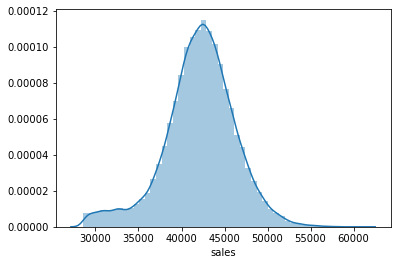

In [24]:
sns.distplot(boston_3['sales'])

In [25]:
boston_2['sales'] = boston_3['sales']
boston_2.corr()

,crim,zn,indus,rm,age,tax,ptratio,black,population,families,median_home_value,median_income,sales
crim,1.000000,-0.262184,0.455814,-0.329132,0.449735,0.672572,0.293979,-0.554596,0.015496,0.015910,-0.482760,-0.460133,0.305243
zn,-0.262184,1.000000,-0.561058,0.286717,-0.551657,-0.387297,-0.294334,0.231558,-0.058979,-0.058654,0.410280,0.344643,-0.324335
indus,0.455814,-0.561058,1.000000,-0.423959,0.680825,0.727311,0.361687,-0.431568,0.051745,0.051191,-0.613387,-0.570029,0.456570
rm,-0.329132,0.286717,-0.423959,1.000000,-0.201127,-0.397352,-0.404893,0.199422,-0.069861,-0.070752,0.730008,0.674430,-0.562412
age,0.449735,-0.551657,0.680825,-0.201127,1.000000,0.585378,0.242293,-0.405928,0.113023,0.114287,-0.421139,-0.370694,0.312351
tax,0.672572,-0.387297,0.727311,-0.397352,0.585378,1.000000,0.444021,-0.563741,0.064238,0.065417,-0.638255,-0.627700,0.448691
ptratio,0.293979,-0.294334,0.361687,-0.404893,0.242293,0.444021,1.000000,-0.213609,0.061484,0.060012,-0.575181,-0.521868,0.432132
black,-0.554596,0.231558,-0.431568,0.199422,-0.405928,-0.563741,-0.213609,1.000000,0.042488,0.043993,0.425238,0.394502,-0.268120
population,0.015496,-0.058979,0.051745,-0.069861,0.113023,0.064238,0.061484,0.042488,1.000000,0.995694,-0.082981,-0.080541,0.289588
families,0.015910,-0.058654,0.051191,-0.070752,0.114287,0.065417,0.060012,0.043993,0.995694,1.000000,-0.083819,-0.081702,0.293781


In [26]:
boston_2['county_id'] = range(100,len(boston_2)+100)

In [27]:
boston_final = boston_2.sample(frac=1).reset_index(drop=True)
existing = boston_final.loc[:7431,:]
new = boston_final.loc[7432:,:].drop(columns='sales')

In [28]:
existing.shape

(7432, 14)

In [29]:
new.shape

(21770, 13)

In [30]:
new.to_csv('new.csv',index=False)
existing.to_csv('existing.csv',index=False)